Рабочая тетрадь №4 Мурдасов И.А./ ИМБО-01-24

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

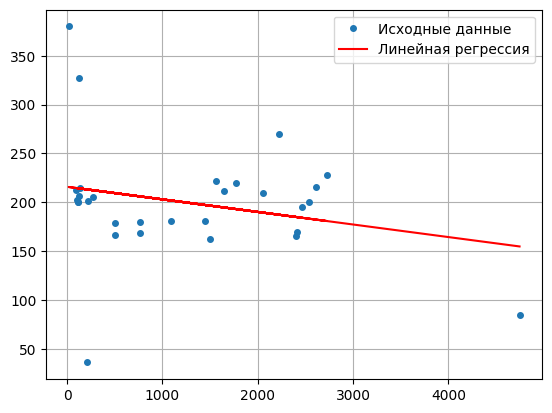

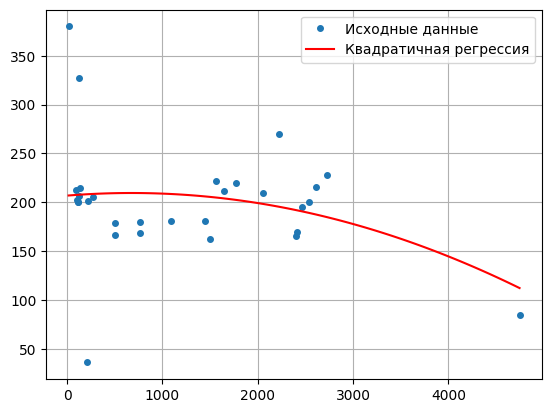

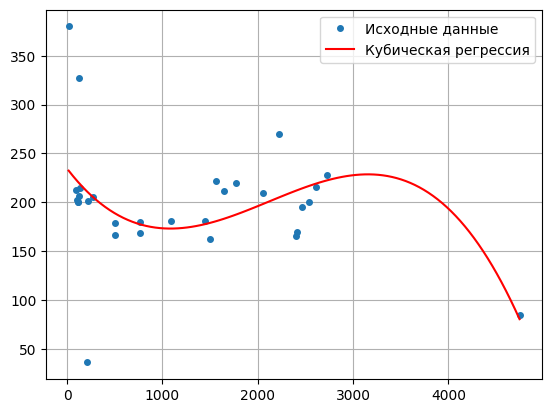

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных, выборка x и y
url = "https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/airlines.csv"
df = pd.read_csv(url)
x = df.iloc[:30, 1]
y = df.iloc[:30, -2]

# эстраполяционный полином первого порядка 
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x, m*x + c, 'r', label='Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

# эстраполяционный полином второго порядка 
m = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], 'r', label='Квадратичная регрессия')
plt.legend()
plt.grid()
plt.show()

# эстраполяционный полином третьего порядка 
m = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], 'r', label='Кубическая регрессия')
plt.legend()
plt.grid()
plt.show()

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

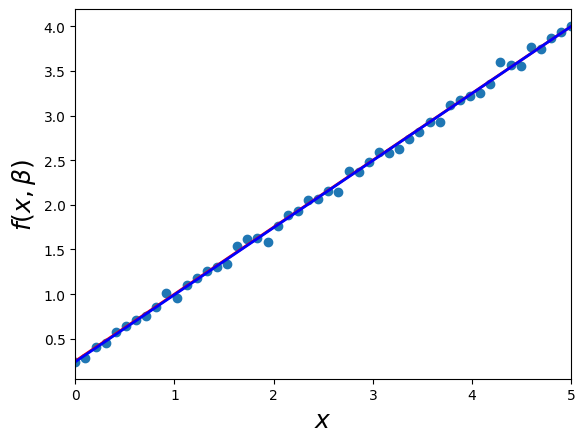

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Загрузка данных, выборка x и y
url = "https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/airlines.csv"
df = pd.read_csv(url)
x = df.iloc[:30, 1]
y = df.iloc[:30, -2]

beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.


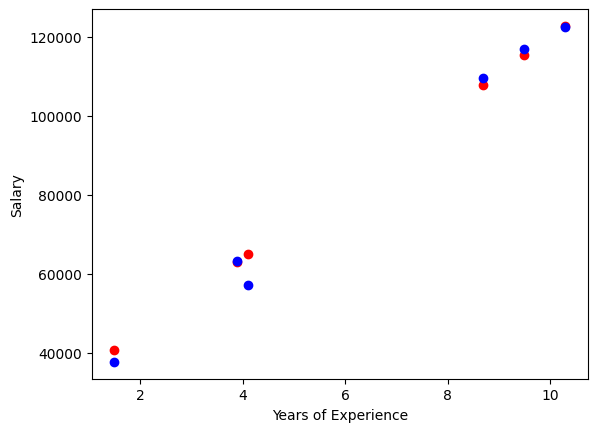

26780.09915062818 [9312.57512673]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
plt.scatter(X_test, predict, color='red')
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
print(regressor.intercept_, regressor.coef_) # свободный коэф, коэф при х

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance

url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df = pd.read_csv(url)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
# ошибка
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict))

# сравнение предикций и настоящих значений
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
df_new

# коэффициенты
#print(pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"]))

# график сравнения
#plt.scatter(y_test, predict, color='green')
#plt.show()

Mean Squared Error: 0.3844711978201246


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета. 
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.
